# SARIMA

In [7]:
from utilities.std_imports import *
import datetime as dt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

### Data Loading

In [2]:
def parser(x):
    return dt.datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


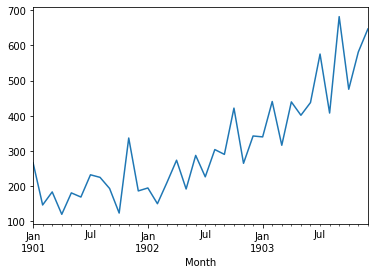

In [3]:
ts = pd.read_csv(ts_path + 'shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(ts.head())
ts.plot();

### Fit Model

In [11]:
tre = (1, 1, 1)
sea = (1, 1, 1, 12)
model = SARIMAX(ts, order=tre, seasonal_order=sea)
model_fit = model.fit()
model_fit.summary()

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -138.544
Date:                            Mon, 30 Aug 2021   AIC                            287.088
Time:                                    14:53:27   BIC                            292.766
Sample:                                01-01-1901   HQIC                           288.516
                                     - 12-01-1903                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5901      0.506     -1.166      0.244      -1.582       0.402
ma.L1         -0.5226      0.379     -1.380      0.168      -1.265       0.220
ar.S.L12      -0.9984      0.059    -16.805      0.000      -1.115      -0.882
ma.S.L12       0.9422      1.131      0.833      0.405      -1.275       3.160
sigma2      5591.1381      0.000   2.57e+07      0.000    5591.138    5591.138
===================================================================================
Ljung-Box (L1) (Q):                   2.49   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.11   Prob(JB):                         0.81
Heteroskedasticity (H):               1.97   Skew:                             0.28
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.53e+23. Standard errors may be unstable.
"""

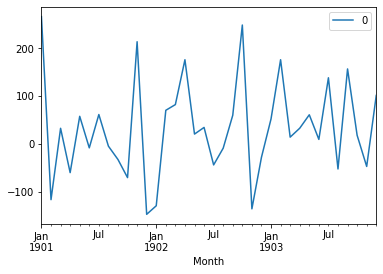

In [12]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

                0
count   36.000000
mean    33.100556
std    103.606492
min   -147.466496
25%    -35.663425
50%     26.409147
75%     73.088383
max    266.000000


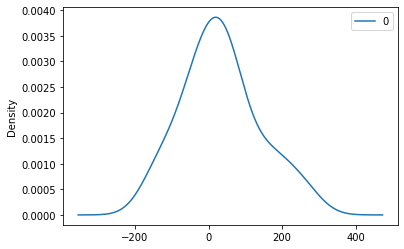

In [13]:
print(residuals.describe())
residuals.plot(kind='kde');

### Validation

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645323, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


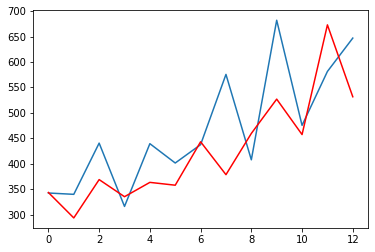

In [14]:
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
hists = [x for x in train]
fcsts = list()

for t in range(len(test)):
    model = ARIMA(hists, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    fcst = output[0]
    fcsts.append(fcst)
    hist = test[t]
    hists.append(hist)
    print('predicted=%f, expected=%f' % (fcst, hist))

rmse = sqrt(mean_squared_error(test, fcsts))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(fcsts, color='red');

### Credits & Links

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/